In this chapter, we will use BioPython to read in some genomic sequences. We will see how BioPython reads from files, and we'll inspect the resulting `SeqRecord` objects. We'll use the genome of e. coli as our leading example, as it is very well understood and not too large.

APIs covered:
- `Bio.Seq`
- `Bio.SeqIO`
- `Bio.SeqUtils`

We'll focus mostly on reading in data from FASTA files, but reading data from other formats will be similar.


The _genome_ is the collection of all the genetic material from an organism. The _genome sequence_ is a long string in the alphabet A, C, G, T. Depending on organism, the genome sequence differs in length, ranging from the very short (160 000 base pairs, a bacterium called Carsonella ruddi) to the very long (133 billion basepairs in the marbled lungfish). The human genome is about 3 billion base pairs long. 

Genomic sequences are commonly (but not always) saved as text files, and [FASTA](https://en.wikipedia.org/wiki/FASTA_format) is a very common file format. A FASTA file can contain one or several records, and each record consists of a header line, followed by the sequence itself. Each description is a single line starting with a `>` sign and followed by a unique identifier for the sequence. The sequence can either be a nucleotide sequence (A, C, G, T, ..) or a protein sequence.

In [1]:
!head data/fungi.ITS.fna

>NR_132798.1 Roccella elisabethae S L14846 ITS region; from TYPE material
GAACCTGCGGAAGGATCATTATTAAGACAGGGCCTGTTAGGCCCGACCTCCAACCCCCTGTCTACCCATCTATTGTTGCT
TTGGCGGTGCGTCTGGTACTTGCCGCACGCGTTACGGCTAAGAACCGCCAGTGGCCCGGCGCGCGCGCGGGGCCGCTGAG
TCGCCGTCAAGGGGCTACCACTAAATTCTCCGCACTAGTAAGCAGTCTAAGAGGAACTTTTAAAATAATCGCTTTTAAAA
AAAAAAAAACTTTCAACAACGGATCTCTTGGTTCTGGCATCGATGAAGAACGCAGCGAAATGCGATAAGTAATGTGAATT
GCAGAATTCAGTGAATCATCGAATCTTTGAACGCATCTTGCGCCCTCCGGTATCCCCGGTGGGCATGCCTGTTCGAGCGT
CATTCGTTAAAATCATCAAGCACCGCTTGGTATTGGGTCTGACGTCCCTGCACCCGCAGAGGGACGTACCCTAAACCCCT
CGGCAACGTCTCGTGGCCGTAGGCGTAGCGGAACATAATCTTTACCACGTCTACGAGGCGCGCGAGGTCGTCCAGCCCCT
CTGAATCTAACGTAGAACCTTACCGTTGACCTCGGATCAGGTAGGAGTACCCGCTGAACTTAAGCATATCAATAAGCGGA
GGAA


A FASTA file can contain one or more records. Usually, counting the number of sequences in a file is equivalent to counting the number of lines that start with `>`.

1. Write a small snippet of code that counts the number of sequences in the file `data/fungi.ITS.fna`.

In [3]:
# Your implementation here




When dealing with sequences in text format, it is useful to keep in mind that one base is one character, so that genome sizes can easily be estimated:

- The genome of e. coli is about 4.6 million base pairs in length, and takes up 4.6MB of disk space.
- A human genome (3 billion base pairs) is about 3 GB in size.




For most of this tutorial we will work with bacterial or fungal genomes, since they have several advantages:

- The genomes are fairly short: on the order of a few million base pairs, so that each bacterial genome is a few megabytes in size.
- There is a subset of bacteria and fungi whose role in nature, medicine, industry, ... is very well understood. These organisms also have a well-sequenced genomic sequence.

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import Bio

print(Bio.__version__)

1.70


Reading and writing sequence records
----

In this first part, we will explore how BioPython allows us to easily read and write sequences. The data that we will use for this lives in the `data/` folder of this repo. We will use FASTA files exclusively, but BioPython's [SeqIO](https://biopython.org/wiki/SeqIO) module has support for many more file formats. Usually, reading a different file format is as easy as changing a single parameter.

SeqIO has several different ways of reading files:

- `SeqIO.read`: for files that contain a single sequence.
- `SeqIO.parse`: reads a file and returns an _iterator_ over SeqRecord instances
- `SeqIO.index`: reads a file and returns a _dict-like_ object.

Both `SeqIO.parse` and `SeqIO.index` don't read all data into memory at once (useful when you have a 100GB sequence file!) but they differ in what they return. `SeqIO.parse` opens the file for reading, and returns an iterator over sequences. This allows you to process sequences in _streaming_ fashion, e.g.
```python
seqs = SeqIO.parse("my-fasta-file.fa", "fasta")
for seq in seqs:
    print(seq)

seqs.close()
```

`SeqIO.index` does a little more work. It scans through the file and records for each sequence the ID of the sequence and the location of the sequence in the file. This allows you to retrieve a single sequence record at a time by specifying the ID:

```python
index = SeqIO.index("my-fasta-file.fa", "fasta")
print(index["NR_132798.1"])

```

One last note: reading a different file format in BioPython is as easy as changing the format string. For example, to read an AB1 file (a file format used in Sanger sequencing), you can do 
```python
abi_seqs = SeqIO.parse("fname.ab1", "ab1")
```

In [5]:
from Bio import SeqIO

In the data folder, we have a file called `data/fungi.ITS.fna`.

1. Open the file for reading with `SeqIO.parse`.

1. Extract the first record and print it. What data type is this record?

1. Close the sequence file.

1. Open the file for reading with `SeqIO.index`. Extract the record for the sequence with ID `NR_111007.1`. How many records are there in the entire file?

In [ ]:
# Your implementation here




Lastly, run some experiments to compare timings for `SeqIO.parse` and `SeqIO.index`. Which one is faster?

Hint: you can use the `%timeit` IPython magic command to record the execution time for a Python function call.

In [ ]:
# Your implementation here.




Aside: it is good form to _close_ the sequence index or iterator explicitly when you are done with it. This will free up whatever resources were associated with it, and signals to the reader of your code that you are "done" with reading sequences. Moreover, Python 3 will warn you explicitly when an open file is garbage collected.

To avoid having to pepper your code with explicit calls to `index.close()`, you can pass in an explicit file handle, or use the `contextlib.closing` context manager.

In [9]:
from contextlib import closing

with closing(SeqIO.parse("data/fungi.ITS.fna", "fasta")) as fungi0:
    print(next(fungi0))
    
with open("data/fungi.ITS.fna") as fp:
    fungi1 = SeqIO.parse(fp, "fasta")
    print(next(fungi1))

ID: NR_132798.1
Name: NR_132798.1
Description: NR_132798.1 Roccella elisabethae S L14846 ITS region; from TYPE material
Number of features: 0
Seq('GAACCTGCGGAAGGATCATTATTAAGACAGGGCCTGTTAGGCCCGACCTCCAAC...GAA', SingleLetterAlphabet())
ID: NR_132798.1
Name: NR_132798.1
Description: NR_132798.1 Roccella elisabethae S L14846 ITS region; from TYPE material
Number of features: 0
Seq('GAACCTGCGGAAGGATCATTATTAAGACAGGGCCTGTTAGGCCCGACCTCCAAC...GAA', SingleLetterAlphabet())


Exploring sequence records
----

Now let's explore the `SeqRecord` class a little more in detail. In the repository we have a FASTA file `data/GCF_000005845.2_ASM584v2_genomic.fna` containing a reasonably up-to-date reference genome for the bacterium e. coli.

1. Read this file into a single sequence record.
1. Find the length of this sequence record.
1. What is the description for the sequence record?
1. Call the `repr` function on the "sequence" itself (accessible via the `.seq` attribute). What type is this object?

For the last part, do not attempt to print the sequence directly (it's long).

In [ ]:
# Your implementation here.




As you can see, the `SeqRecord` contains the full sequence together with some metadata. The `Seq` object contains just the sequence, with some information about the alphabet. Both the sequence record and the sequence itself are object that can be sliced, iterated over, ... and therefore they interact quite naturally with the rest of the Python universe.

For example, let's count the number of bases A, C, G, T across the entire sequence.

In [13]:
from collections import Counter

record = SeqIO.read("data/GCF_000005845.2_ASM584v2_genomic.fna", "fasta")

seq = record.seq
Counter(record.seq)

Counter({'A': 1142742, 'C': 1180091, 'G': 1177437, 'T': 1141382})

Let's slice out a particular region of the sequence and assign it to a variable `cds`. The reason for the particular indices will become clear later on...

In [14]:
start, stop = 205125, 208608  # dnaE, dna polymerase III, alpha subunit

cds = seq[start:stop]
cds

Seq('ATGTCTGAACCACGTTTCGTACACCTGCGGGTGCACAGCGACTACTCGATGATC...TAA', SingleLetterAlphabet())

In [15]:
len(cds)

3483

Last, sequences aren't just plain old containers, they also have some specific genomic functionality.

We can ask for the _reverse complement_...

In [16]:
cds.reverse_complement()

Seq('TTAGTCAAACTCCAGTTCCACCTGCTCCGAACCAATGAGGCCACGGAGATCGTT...CAT', SingleLetterAlphabet())

... or the RNA sequence for a given DNA sequence ...

In [17]:
cds.transcribe()

Seq('AUGUCUGAACCACGUUUCGUACACCUGCGGGUGCACAGCGACUACUCGAUGAUC...UAA', RNAAlphabet())

... and even the protein that is expressed by a given DNA sequence, according to the "central dogma" of molecular biology. 

By setting `cds=True` we ask BioPython to check that the length of the DNA sequence is a multiple of 3, since each amino acid is encoded by 3 bases, and that the sequence starts with a _start codon_ and ends with a _stop codon_.

In [18]:
protein = cds.translate(cds=True)
protein

Seq('MSEPRFVHLRVHSDYSMIDGLAKTAPLVKKAAALGMPALAITDFTNLCGLVKFY...EFD', ExtendedIUPACProtein())

In [19]:
print(protein)

MSEPRFVHLRVHSDYSMIDGLAKTAPLVKKAAALGMPALAITDFTNLCGLVKFYGAGHGAGIKPIVGADFNVQCDLLGDELTHLTVLAANNTGYQNLTLLISKAYQRGYGAAGPIIDRDWLIELNEGLILLSGGRMGDVGRSLLRGNSALVDECVAFYEEHFPDRYFLELIRTGRPDEESYLHAAVELAEARGLPVVATNDVRFIDSSDFDAHEIRVAIHDGFTLDDPKRPRNYSPQQYMRSEEEMCELFADIPEALANTVEIAKRCNVTVRLGEYFLPQFPTGDMSTEDYLVKRAKEGLEERLAFLFPDEEERLKRRPEYDERLETELQVINQMGFPGYFLIVMEFIQWSKDNGVPVGPGRGSGAGSLVAYALKITDLDPLEFDLLFERFLNPERVSMPDFDVDFCMEKRDQVIEHVADMYGRDAVSQIITFGTMAAKAVIRDVGRVLGHPYGFVDRISKLIPPDPGMTLAKAFEAEPQLPEIYEADEEVKALIDMARKLEGVTRNAGKHAGGVVIAPTKITDFAPLYCDEEGKHPVTQFDKSDVEYAGLVKFDFLGLRTLTIINWALEMINKRRAKNGEPPLDIAAIPLDDKKSFDMLQRSETTAVFQLESRGMKDLIKRLQPDCFEDMIALVALFRPGPLQSGMVDNFIDRKHGREEISYPDVQWQHESLKPVLEPTYGIILYQEQVMQIAQVLSGYTLGGADMLRRAMGKKKPEEMAKQRSVFAEGAEKNGINAELAMKIFDLVEKFAGYGFNKSHSAAYALVSYQTLWLKAHYPAEFMAAVMTADMDNTEKVVGLVDECWRMGLKILPPDINSGLYHFHVNDDGEIVYGIGAIKGVGEGPIEAIIEARNKGGYFRELFDLCARTDTKKLNRRVLEKLIMSGAFDRLGPHRAALMNSLGDALKAADQHAKAEAIGQADMFGVLAEEPEQIEQSYASCQPWPEQVVLDGERETLGLYLTGHPINQYLKEIERYVGGVRLKDMHPTERGKVITAAGLV

In the above, we have glossed over one important detail: how does BioPython know which _codons_ correspond to each amino acid? The answer is that there are different codon tables for the different branches of life, and by default BioPython uses table #1, the standard table for Eukarya.

In [20]:
from Bio.Data import CodonTable
standard_table = CodonTable.unambiguous_dna_by_id[1]

print(standard_table)

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

Recall that we are working with e. coli, a bacterium, so this is not the correct translation table. 

1. Take a look at `CodonTable.unambiguous_dna_by_name` to find a translation table that is appropriate for e. coli.

2. Run the translation again, and compare the resulting protein to the one that we obtained using the standard table. Are the two proteins identical?

In [21]:
# Your implementation here.




 Fortunately, the translated protein ends up being identical in this case. 
 
 1. Check this explicitly.

In [ ]:
# Your implementation here.




More genomic information with SeqUtils
----

SeqUtils is a BioPython module to compute some quantities of interest for genomic sequences, such as GC content, molecular weights, etc. It is not strictly necessary to use this module; many of these quantities can also be computed with straightforward Numpy (or a little Cython).

In [22]:
from Bio import SeqUtils

Here we focus on computing the _GC skew_ along a sliding window. That is, we break the genome up into pieces of a fixed size (1000 bases in the example) and for each piece we compute the quantity

$$
    \text{skew} = \frac{G - C}{G + C}
$$

If there are as many Gs as there are Cs, the skew is 0, and if G is more/less abundant, the skew is positive/negative.

Given that we saw earlier that there are globally about 25% As, 25% Cs, 25% Gs, and 25% Ts, should we conclude that the skew is always zero? Let's find out!

1. Use `SeqUtils.GC_skew` to compute the GC skew with a 1000-base window. Hint: you should get a list of 4642 numbers.
1. The result of the first step is a list of values, which is not very informative. Make a plot of the GC skew. Does it look like the skew is always roughly 0?

In [25]:
# Your implementation here.




If all goes well, the previous step should have given you a fairly noisy plot. We can get a clearer signal by instead plotting the _cumulative GC skew_.

1. Make a plot of the cumulative GC skew. (_Hint_: you can use `numpy.cumsum` to compute the cumulative sum of a list of values).

In [26]:
# Your implementation here.




This is quite surprising: we may have assumed that Gs and Cs would be distributed more or less randomly throughout the genome. Instead we see that the amount of Gs steadily increases until it reaches a maximum, and then decreases again. 


There is a good biological reason for this. Normally DNA is quite stable, and in equilibrium you expect to see about as many G as there is C (and similarly for A and T). However, during replication DNA is not in equilibrium. Replication of bacterial chromosomes usually starts at a single, well-defined location. The DNA strand is opened into two strands of single-stranded DNA, and for a circular chromosome (like that of e. coli) replication then proceeds in two directions. However, DNA polymerase, the enzyme that replicates DNA, can only move from the 5' to the 3' end of a DNA strand. That means that one strand, the _leading_ strand, is replicated continuously, while the other one (the _lagging_ strand) is replicated in fits and starts. It is thought that this asymetry ultimately leads to the imbalance between G and C that we observe.

This provides a mechanism to find the _origin of replication_ in a genome (the place where DNA replication starts): it corresponds roughly to the _minimum_ of the cumulative GC skew. (This mechanism is not always appropriate).

More information in [Rocha, _The replication-related organization of bacterial genomes._](https://www.ncbi.nlm.nih.gov/pubmed/15184548)

Using sequence databases to find more information about genomes
----

We are not limited to writing our own algorithms to find e.g. the origin of replication. For well-studied organisms such as e. coli a vast array of information is available (e.g. genes and coding sequences, repeats, CRISPR arrays, ...) that can be queried from more-or-less standard databases (available online).

One such database is Genbank, XYZ.

We will look at the Genbank record for e. coli. To avoid having to download this, the entire record has been provided with this repository. It is about 12MB in size (5MB for the sequence, and 7MB for the remaining metadata).

In [27]:
!head data/GCF_000005845.2_ASM584v2_genomic.gbff

LOCUS       NC_000913            4641652 bp    DNA     circular CON 08-AUG-2016
DEFINITION  Escherichia coli str. K-12 substr. MG1655, complete genome.
ACCESSION   NC_000913
VERSION     NC_000913.3
DBLINK      BioProject: PRJNA57779
            BioSample: SAMN02604091
            Assembly: GCF_000005845.2
KEYWORDS    RefSeq.
SOURCE      Escherichia coli str. K-12 substr. MG1655
  ORGANISM  Escherichia coli str. K-12 substr. MG1655


Let's start by reading the Genbank record from the file `data/GCF_000005845.2_ASM584v2_genomic.gbff` into a `SeqRecord`.

In [30]:
gbk_record = SeqIO.read("data/GCF_000005845.2_ASM584v2_genomic.gbff", "genbank")

Like our previous `SeqRecord` instances, this one has a `.seq`, a `.id`, a `.description`, etc. It also has some more information that's specific to Genbank. Let's look at the `.features` attribute. This is a list of genomic features (genes, coding sequences, origin of replication, ...).

In [31]:
feature = gbk_record.features[10]
feature

SeqFeature(FeatureLocation(ExactPosition(5233), ExactPosition(5530), strand=1), type='CDS')

In [32]:
feature.type

'CDS'

Each feature has an `.extract` method to slice out the region of the sequence that corresponds to it.

In [33]:
feature.extract(gbk_record.seq)

Seq('GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGGTCGCTCCC...TAA', IUPACAmbiguousDNA())

Features also have a `.qualifiers` dictionary with metadata.

In [34]:
feature.qualifiers

OrderedDict([('gene', ['yaaX']),
             ('locus_tag', ['b0005']),
             ('gene_synonym', ['ECK0005; JW0004']),
             ('codon_start', ['1']),
             ('transl_table', ['11']),
             ('product', ['DUF2502 family putative periplasmic protein']),
             ('protein_id', ['NP_414546.1']),
             ('db_xref',
              ['ASAP:ABE-0000015',
               'UniProtKB/Swiss-Prot:P75616',
               'EcoGene:EG14384',
               'GeneID:944747']),
             ('translation',
              ['MKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDHGWWKQHYEWRGNRWHLHGPPPPPRHHKKAPHDHHGGHGPGKHHR'])])

In [35]:
set(feature.type for feature in gbk_record.features)

{'CDS',
 'gene',
 'misc_feature',
 'mobile_element',
 'ncRNA',
 'rRNA',
 'rep_origin',
 'repeat_region',
 'source',
 'tRNA',
 'tmRNA'}

Let's put our knowledge to good use.

1. Iterate over the features, and count the number of _genes_ in E. Coli. 
1. Find the location of the `rep_origin` feature. Does this agree with the answer we got from GC skew?
1. Find the feature that corresponds to the coding sequence for the `dnaE` gene.
1. What percentage of the genome consists of coding regions?

In [36]:
# Your implementation here.




Bonus question: let's compare the GC content in coding regions versus non-coding regions. With what we have seen of features so far, plus some Matplotlib, this is quite achievable.

1. Divide the genome into coding and non-coding sequences. Hint: we already know the CDS regions; the non-CDS regions are the regions in between CDS regions.
2. Use the `SeqUtils.GC` function to find the GC content in each region.
3. Make a plot with two histograms: one with the GC content for CDS regions, and one with the GC content for non-CDS regions.

Do you find that the GC content is significantly different for CDS and non-CDS regions?

In [37]:
# Your implementation here.




Getting information from protein databases
---

At this point, we come quite far. We know what genes e. coli posseses, as well as their locations, and we even know the protein sequences (either by inspecting the Genbank record, or by doing the translation ourselves). What we don't know so far is the _why_: what is the function of all these proteins? 

Luckily, BioPython allows us to answer that question as well. If you inspect the protein metadata, you'll notice identifiers for that protein in _protein databases_, such as swiss-prot. Querying this information allows you to find more information about the function and structure of proteins.

Note: the following cell assumes that you have a working internet connection. If you cannot download the record for some reason, you can also use a downloaded copy that comes with this notebook. 

In [38]:
from Bio import ExPASy
from Bio import SwissProt

# P10443 is the protein made by dnaE
with ExPASy.get_sprot_raw("P10443") as handle:
    record = SwissProt.read(handle)

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [40]:
# # Use this version if downloading the record doesn't work
# with open('data/P10443.txt') as handle:
#     record = SwissProt.read(handle)

Records have a few useful properties:

In [41]:
print(record.entry_name)

DPO3A_ECOLI


In [42]:
print(record.taxonomy_id)

['83333']


In [43]:
print(record.organism)

Escherichia coli (strain K12).


In [44]:
print(record.organism_classification)

['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Enterobacterales', 'Enterobacteriaceae', 'Escherichia']


In [45]:
print(record.comments)

["FUNCTION: DNA polymerase III is a complex, multichain enzyme responsible for most of the replicative synthesis in bacteria (PubMed:2932432). This DNA polymerase also exhibits 3' to 5' exonuclease activity. The alpha chain is the DNA polymerase catalytic subunit (PubMed:2932432). It is tethered to replicating DNA by the beta sliding clamp (dnaN), which confers extremely high processivity to the catalytic subunit, copying a 5.4 kb genome in 11 seconds, a speed of at least 500 nucleotides/second at 30 degrees Celsius (PubMed:2413035). {ECO:0000269|PubMed:2413035, ECO:0000269|PubMed:2932432}.", 'CATALYTIC ACTIVITY: Deoxynucleoside triphosphate + DNA(n) = diphosphate + DNA(n+1). {ECO:0000269|PubMed:2932432}.', "SUBUNIT: The DNA polymerase III holoenzyme complex contains at least 10 different subunits organized into 3 functionally essential subassemblies: the Pol III core, the beta sliding clamp processivity factor and the clamp-loading complex. The Pol III core (subunits alpha, epsilon an

In [46]:
print(record.cross_references)

[('EMBL', 'M19334', 'AAC36920.1', '-', 'Genomic_DNA'), ('EMBL', 'U70214', 'AAB08613.1', '-', 'Genomic_DNA'), ('EMBL', 'U00096', 'AAC73295.1', '-', 'Genomic_DNA'), ('EMBL', 'AP009048', 'BAA77859.1', '-', 'Genomic_DNA'), ('EMBL', 'S52931', 'AAB24889.1', '-', 'mRNA'), ('EMBL', 'M96394', 'AAA70369.1', 'ALT_INIT', 'Genomic_DNA'), ('EMBL', 'D49445', 'BAA08424.1', '-', 'Genomic_DNA'), ('PIR', 'C28390', 'DJEC3A'), ('RefSeq', 'NP_414726.1', 'NC_000913.3'), ('RefSeq', 'WP_001294757.1', 'NZ_LN832404.1'), ('PDB', '2HNH', 'X-ray', '2.30 A', 'A=1-910'), ('PDB', '2HQA', 'X-ray', '2.60 A', 'A=1-917'), ('PDB', '4GX8', 'X-ray', '1.70 A', 'A/B/C/D=1-270'), ('PDB', '4GX9', 'X-ray', '2.15 A', 'A/B/C/D=1-270'), ('PDB', '4JOM', 'X-ray', '2.90 A', 'A=1-917'), ('PDB', '5FKU', 'EM', '8.34 A', 'A=1-1160'), ('PDB', '5FKV', 'EM', '8.00 A', 'A=1-1160'), ('PDB', '5FKW', 'EM', '7.30 A', 'A=1-1160'), ('PDB', '5M1S', 'EM', '6.70 A', 'A=1-927'), ('PDBsum', '2HNH', '-'), ('PDBsum', '2HQA', '-'), ('PDBsum', '4GX8', '-'), 

The `.cross_references` attribute contains accessions for records in other databases. Here, we extract the PDB references. PDB (Protein Data Bank) is a databank of molecular structures for proteins, and we can query it for information about the molecular structure of DNA polymerase.

In [47]:
pdb_refs = []
for ref in record.cross_references:
    if ref[0] == 'PDB':
        print(ref)
        pdb_refs.append(ref[1])
        
# Let's analyze one PDB record
pdb_ref = pdb_refs[0]

('PDB', '2HNH', 'X-ray', '2.30 A', 'A=1-910')
('PDB', '2HQA', 'X-ray', '2.60 A', 'A=1-917')
('PDB', '4GX8', 'X-ray', '1.70 A', 'A/B/C/D=1-270')
('PDB', '4GX9', 'X-ray', '2.15 A', 'A/B/C/D=1-270')
('PDB', '4JOM', 'X-ray', '2.90 A', 'A=1-917')
('PDB', '5FKU', 'EM', '8.34 A', 'A=1-1160')
('PDB', '5FKV', 'EM', '8.00 A', 'A=1-1160')
('PDB', '5FKW', 'EM', '7.30 A', 'A=1-1160')
('PDB', '5M1S', 'EM', '6.70 A', 'A=1-927')


Now that we have a single PDB record, let's view the molecular structure. There are many molecular viewers in Python, and some even play well with the notebook.

- https://github.com/arose/nglview
- https://github.com/avirshup/py3dmol
- https://pymol.org/2/

Here we use `nglview`.

In [48]:
print(pdb_ref)

2HNH


In [49]:
import nglview

view = nglview.show_pdbid(pdb_ref)
view

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [50]:
from Bio import PDB

pdbl = PDB.PDBList()
pdb_fname = pdbl.retrieve_pdb_file(pdb_ref)

print(pdb_fname)

parser = PDB.MMCIFParser()
structure = parser.get_structure(pdb_ref, pdb_fname)

Structure exists: '/Users/jvankerschaver/src/jvkersch/bio-tutorial/hn/2hnh.cif' 
/Users/jvankerschaver/src/jvkersch/bio-tutorial/hn/2hnh.cif


In [51]:
structure

<Structure id=2HNH>

In [52]:
list(structure.get_atoms())

[<Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom SD>,
 <Atom CE>,
 <Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom OG>,
 <Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom CD>,
 <Atom OE1>,
 <Atom OE2>,
 <Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom CD>,
 <Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom CD>,
 <Atom NE>,
 <Atom CZ>,
 <Atom NH1>,
 <Atom NH2>,
 <Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom CD1>,
 <Atom CD2>,
 <Atom CE1>,
 <Atom CE2>,
 <Atom CZ>,
 <Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG1>,
 <Atom CG2>,
 <Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom ND1>,
 <Atom CD2>,
 <Atom CE1>,
 <Atom NE2>,
 <Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom CD1>,
 <Atom CD2>,
 <Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom CD>,
 <Atom

Making a genome diagram
---

So far we've studied genes and coding sequences as separate features. It is often useful, however, to have a global representation of the entire genome. This can help us figure out, for example, where regions of interest are.

BioPython offers a way to achieve this by means of a genome diagram: a picture of a genome with regions of interest indicated. BioPython has a convenient API to add new features to the diagram, which we explore here.

Instead of working with the full e. coli genome (which is far too large for a meaningful genome diagram), here we work with a single plasmid, which is much smaller. A plasmid is a piece of circular DNA; the one that we have in the repository is 7395 bases long and contains 10 (putative) genes.

Adapted from http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc262

In [56]:
plasmid = SeqIO.read("data/e_coli_plasmid.gb", "genbank")

In [57]:
from Bio.Graphics import GenomeDiagram
from reportlab.lib import colors

gd_diagram = GenomeDiagram.Diagram("Escherichia coli str. K-12 substr. MG1655")

gd_track_for_features = gd_diagram.new_track(1, name="Annotated Features")

gd_feature_set = gd_track_for_features.new_set()
for feature in plasmid.features:
    if feature.type != 'gene':
        continue
    
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.lightblue
    gd_feature_set.add_feature(feature, sigil="ARROW",
                               color=color, label=True,
                               label_size = 14, label_angle=0)
    
gd_diagram.draw(format="circular", circular=True,
                start=0, end=len(plasmid), circle_core=0.5)
gd_diagram.write("diagram.png", "PNG")

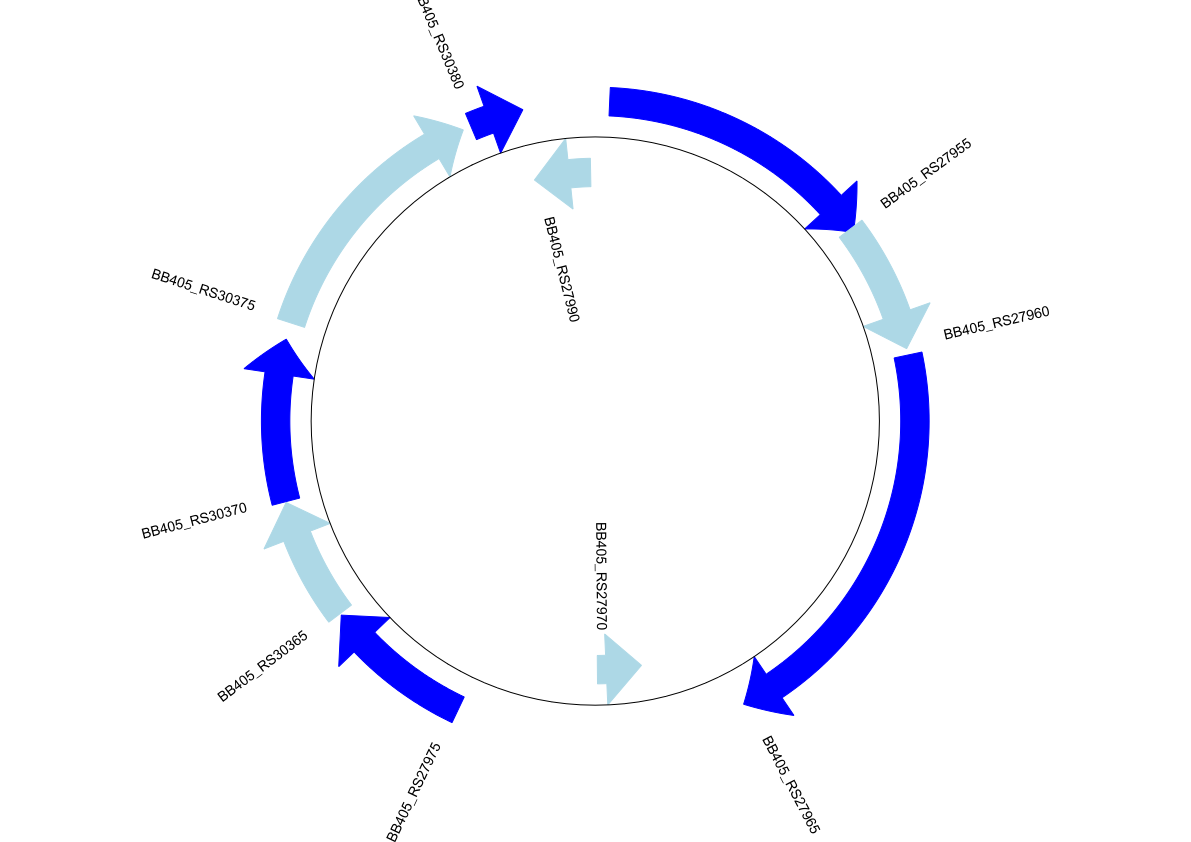

In [58]:
from IPython.display import Image
Image(filename='diagram.png') 